In [1]:
import cv2
from PIL import Image
import numpy as np
from mtcnn import MTCNN
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
age= ctrl.Antecedent(np.arange(0,4.02,0.01),"age") #input
age['little'] = fuzz.trimf(age.universe, [0,0.5,1.1])
age['medium'] = fuzz.trimf(age.universe, [1.1,1.5,2.1])
age['old'] = fuzz.trimf(age.universe, [1.9,2.1,3.1])
age['too_old'] = fuzz.trimf(age.universe, [3.1,3.1,4.1])

gender = ctrl.Antecedent(np.arange(0, 1.02, 0.01), "gender")
gender['male'] = fuzz.trimf(gender.universe, [0, 0, 0.5])
gender['female'] = fuzz.trimf(gender.universe, [0.5,1,1.1])

emotion = ctrl.Antecedent(np.arange(0, 7.02, 0.01), "emotion")
emotion['angry'] = fuzz.trimf(emotion.universe, [0, 0, 1.1])
emotion['disgust'] = fuzz.trimf(emotion.universe, [0, 1.1, 2.1])
emotion['fear'] = fuzz.trimf(emotion.universe, [1, 2.1, 3.1])
emotion['happy'] = fuzz.trimf(emotion.universe, [2.1, 3.1, 4.1])
emotion['neutral'] = fuzz.trimf(emotion.universe, [3.1, 4.1, 5.1])
emotion['sad'] = fuzz.trimf(emotion.universe, [4.1, 5.1, 6.1])
emotion['surprise'] = fuzz.trimf(emotion.universe, [6.1, 7.1, 7.1])

price = ctrl.Consequent(np.arange(0, 2000001, 1), "price")
price['low'] = fuzz.trimf(price.universe, [0, 0, 500000])
price['medium'] = fuzz.trimf(price.universe, [500000, 1000000, 1750000])
price['high'] = fuzz.trimf(price.universe, [1000000, 2000000, 2000000])

type_blender = ctrl.Consequent(np.arange(0, 3.1, 0.1), "type_blender")
type_blender['countertop'] = fuzz.trimf(type_blender.universe, [0, 0, 1])
type_blender['immersion'] = fuzz.trimf(type_blender.universe, [1, 1.5, 2])
type_blender['portable'] = fuzz.trimf(type_blender.universe, [2, 3, 3])

e:\anaconda3\envs\main2\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
e:\anaconda3\envs\main2\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


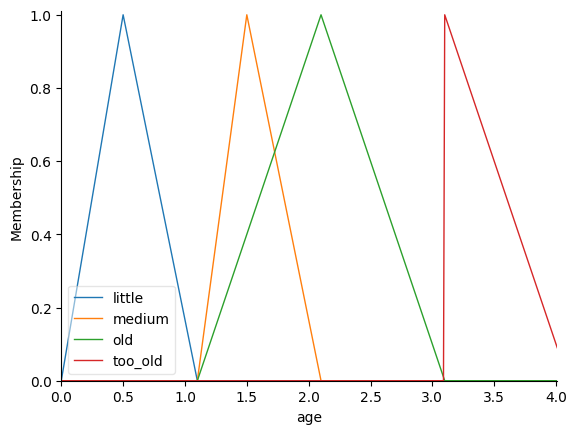

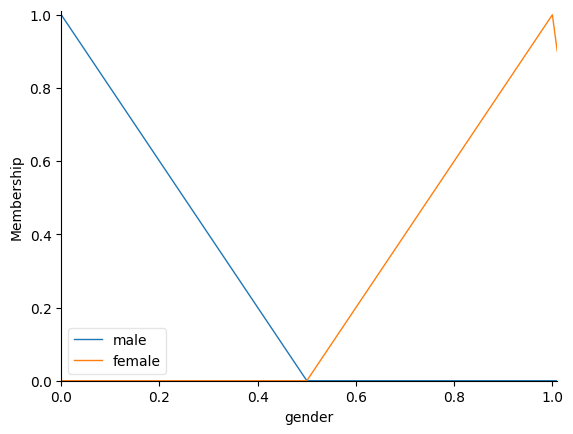

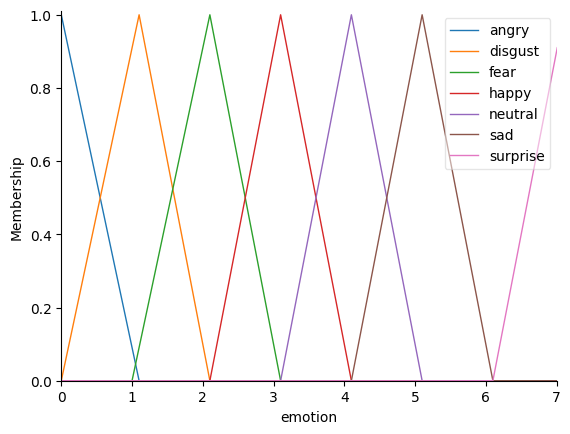

e:\anaconda3\envs\main2\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


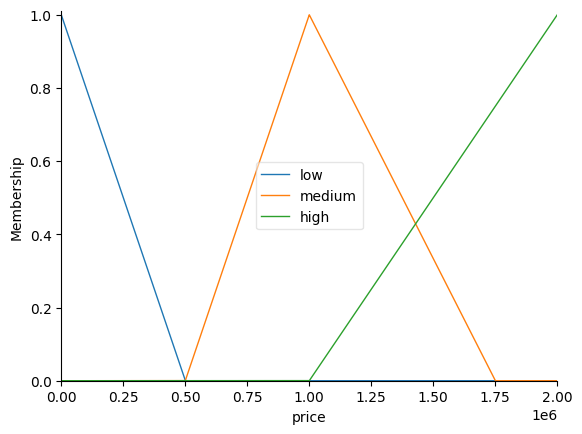

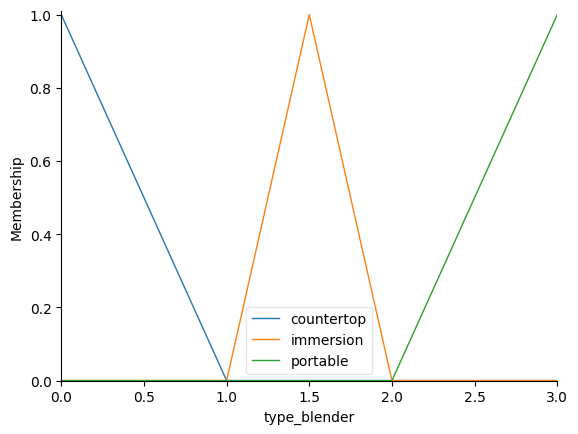

In [3]:
age.view()
gender.view()
emotion.view()
price.view()
type_blender.view()

In [57]:
rule1 = ctrl.Rule(antecedent=((age['little'] & gender['male']) & emotion['happy']), consequent=(price['low'] , type_blender['countertop']))
rule2 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['happy']), consequent=(price['medium'] , type_blender['immersion']))
rule3 = ctrl.Rule(antecedent=((age['old'] | age['too_old']) & gender['female'] & emotion['neutral']), consequent=(price['high'] ,type_blender['portable']))
rule4 = ctrl.Rule(antecedent=((age['medium'] | age['old'] | age['too_old']) & emotion['angry']), consequent=(price['medium'] , type_blender['countertop']))
rule5 = ctrl.Rule(antecedent=(age['little'] & gender['female'] & emotion['sad']), consequent=(price['low'] , type_blender['portable']))
rule6 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['fear']), consequent=(price['medium'] , type_blender['immersion']))
rule7 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['disgust']), consequent=(price['medium'] , type_blender['immersion']))
rule8 = ctrl.Rule(antecedent=((age['old'] & gender['male']) & emotion['neutral']), consequent=(price['high'] , type_blender['countertop']))
rule9 = ctrl.Rule(antecedent=((age['too_old'] & gender['female']) & emotion['surprise']), consequent=(price['high'] , type_blender['portable']))
rule10 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['sad']), consequent=(price['medium'] , type_blender['immersion']))
rule11 = ctrl.Rule(antecedent=((age['old'] & gender['female']) & emotion['happy']), consequent=(price['high'] , type_blender['countertop']))
rule12 = ctrl.Rule(antecedent=((age['too_old'] & gender['male']) & emotion['disgust']), consequent=(price['high'] , type_blender['portable']))
rule13 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['fear']), consequent=(price['medium'] , type_blender['immersion']))
rule14 = ctrl.Rule(antecedent=((age['little'] & gender['female']) & emotion['angry']), consequent=(price['low'] , type_blender['countertop']))
rule15 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['neutral']), consequent=(price['medium'] , type_blender['immersion']))
rule16 = ctrl.Rule(antecedent=((age['old'] & gender['female']) & emotion['fear']), consequent=(price['high'] , type_blender['portable']))
rule17 = ctrl.Rule(antecedent=((age['too_old'] & gender['male']) & emotion['happy']), consequent=(price['high'] , type_blender['countertop']))
rule18 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['surprise']), consequent=(price['medium'] , type_blender['countertop']))
rule19 = ctrl.Rule(antecedent=((age['old'] & gender['male']) & emotion['sad']), consequent=(price['high'] , type_blender['immersion']))
rule20 = ctrl.Rule(antecedent=((age['too_old'] & gender['female']) & emotion['angry']), consequent=(price['high'] , type_blender['portable']))
rule21 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['happy']), consequent=(price['medium'] , type_blender['immersion']))
rule22 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['angry']), consequent=(price['medium'],type_blender['countertop']))
rule23 = ctrl.Rule(antecedent=((age['old'] & gender['female']) & emotion['neutral']), consequent=(price['high'], type_blender['immersion']))
rule24 = ctrl.Rule(antecedent=((age['too_old'] & gender['male']) & emotion['disgust']), consequent=(price['high'] , type_blender['portable']))
rule25 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['happy']), consequent=(price['medium'] ,type_blender['countertop']))
rule26 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['sad']), consequent=(price['medium'] , type_blender['portable']))
rule27 = ctrl.Rule(antecedent=((age['old'] & gender['female']) & emotion['angry']), consequent=(price['high'] , type_blender['countertop']))
rule28 = ctrl.Rule(antecedent=((age['too_old'] & gender['male']) & emotion['happy']), consequent=(price['high'] , type_blender['immersion']))
rule29 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['neutral']), consequent=(price['medium'] , type_blender['portable']))
rule30 = ctrl.Rule(antecedent=((age['medium'] & gender['male']) & emotion['fear']), consequent=(price['medium'] , type_blender['immersion']))
rule31 = ctrl.Rule(antecedent=((age['old'] & gender['female']) & emotion['surprise']), consequent=(price['high'] , type_blender['portable']))
rule32 = ctrl.Rule(antecedent=((age['too_old'] & gender['male']) & emotion['disgust']), consequent=(price['high'] , type_blender['countertop']))
rule33 = ctrl.Rule(antecedent=((age['medium'] & gender['female']) & emotion['sad']), consequent=(price['medium'] , type_blender['immersion']))
rule34 = ctrl.Rule(antecedent =((gender['male'] | age['medium'] | emotion["happy"])), consequent= (price['medium'],type_blender['immersion']))
rule35 = ctrl.Rule(antecedent = ((gender['female']| age['little'] | emotion["angry"])), consequent= (price['low'], type_blender['portable']))

In [58]:
blender_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35])

blender = ctrl.ControlSystemSimulation(blender_ctrl)

In [28]:
def fuzzy_process(age,gender,emotion):
    blender.input['age'] = age
    blender.input['gender'] = gender
    blender.input['emotion'] = emotion
    blender.compute()
    print("Price recommended: " + str(round(blender.output['price'],-5)))
    if (blender.output['type_blender'] >=0 and blender.output['type_blender'] < 1):
        print("Blender type recommended: "+ 'Countertop')
        img = plt.imread("countertop.jpg")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    elif (blender.output['type_blender'] >=1 and blender.output['type_blender'] < 2):
        print("Blender type recommended: "+ 'Immersion')
        img = plt.imread("immersion.jpg")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("Blender type recommended: "+ 'Portable')
        img = plt.imread("portable.jpg")
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    blender._clear_outputs()

In [34]:
age_gen_model =  load_model("ageGen.h5")
mood_model = load_model("emoModel.h5")

In [49]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return 0
    if distr >= 1.65 and distr <= 2.4:return 1
    if distr >= 2.65 and distr <= 3.4:return 2
    if distr >= 3.65 and distr <= 4.4:return 3
    return 4

def get_gender(prob):
    if prob < 0.5:return 0
    else: return 1

def get_result(sample):
    global age1
    global gender1
    sample = sample/255
    val = age_gen_model.predict(np.array([sample]))
    age1 = get_age(val[0])
    gender1 = get_gender(val[1])
    if gender1==0: gender_r = "male"
    else: gender_r = "female"
    if age1 == 0: 
        age_r = "0 to 18"
        print("Are you going to buy a blender?? Seriously?")
    elif age1 == 1: 
        age_r = "18 to 30"
    elif age1 == 2: 
        age_r = "30 to 80"
    else: age_r = "80+"
    print("Predicted Gender:",gender_r,"Predicted Age:",age_r)

In [43]:
def ageGen_pred(path):
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    image1 = cv2.imread(path,0)
    image1 = cv2.resize(image1,dsize=(64,64))
    image1 = image1.reshape((image1.shape[0],image1.shape[1],1))
    sample=image1
    # display(sample)
    res = get_result(sample)


In [45]:
className = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}
def emo_pred(path):
    global mood
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(48,48))
    img=np.array(image)
    img=img.reshape(1,48,48,1)
    predict_x=mood_model.predict(img) 
    result=np.argmax(predict_x,axis=1)
    mood=result[0]
    for key, val in className.items():
        if key == result[0]:
            print("Emotion: " + className[result[0]])
            break
    else:
        print("Value not found !!!!!.")


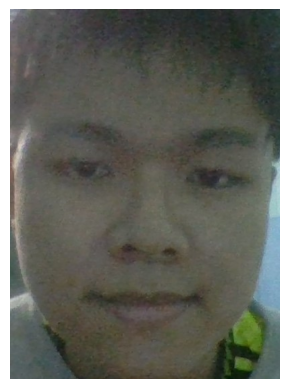

1/1 [==============================] - 0s 46ms/step
Are you going to buy a blender?? Seriously?
Predicted Gender: male Predicted Age: 0 to 18
1/1 [==============================] - 0s 51ms/step
Emotion: Surprise
Price recommended: 1100000.0
Blender type recommended: Countertop


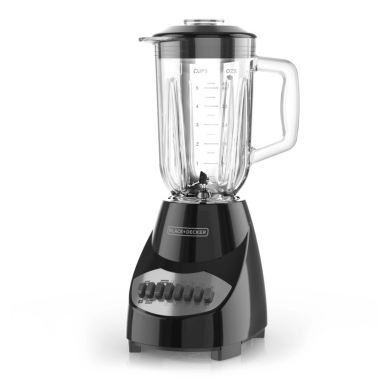

In [50]:
# global age1
# global gender1
# global mood1
ageGen_pred("own.jpg")
emo_pred("own.jpg")
fuzzy_process(age1,gender1,mood)

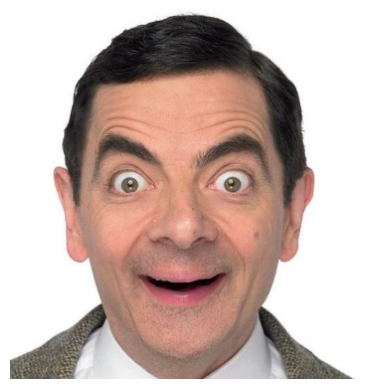

1/1 [==============================] - 0s 49ms/step
Predicted Gender: male Predicted Age: 18 to 30
1/1 [==============================] - 0s 41ms/step
Emotion: Surprise
Price recommended: 1000000.0
Blender type recommended: Countertop


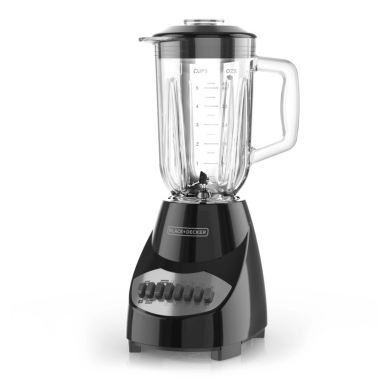

In [51]:
ageGen_pred("mr_bean.jpg")
emo_pred("mr_bean.jpg")
fuzzy_process(age1,gender1,mood)

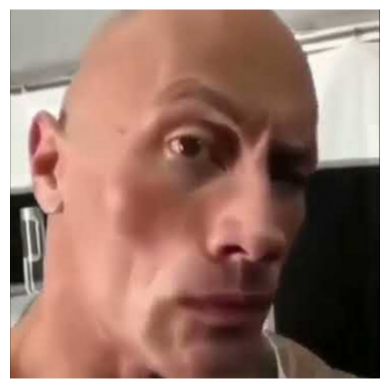

1/1 [==============================] - 0s 51ms/step
Predicted Gender: male Predicted Age: 30 to 80
1/1 [==============================] - 0s 48ms/step
Emotion: Angry
Price recommended: 800000.0
Blender type recommended: Immersion


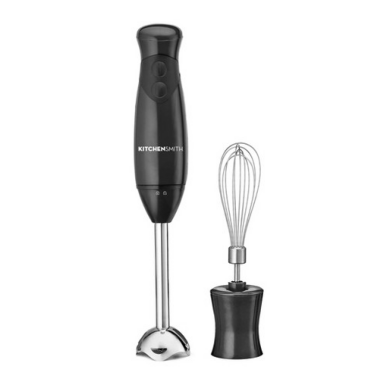

In [60]:
ageGen_pred("therock.jpg")
emo_pred("therock.jpg")
fuzzy_process(age1,gender1,mood)

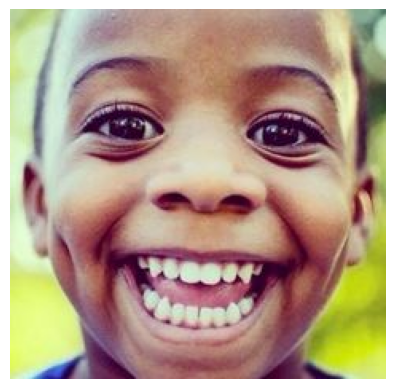

1/1 [==============================] - 0s 45ms/step
Are you going to buy a blender?? Seriously?
Predicted Gender: female Predicted Age: 0 to 18
1/1 [==============================] - 0s 41ms/step
Emotion: Happy
Price recommended: 800000.0
Blender type recommended: Portable


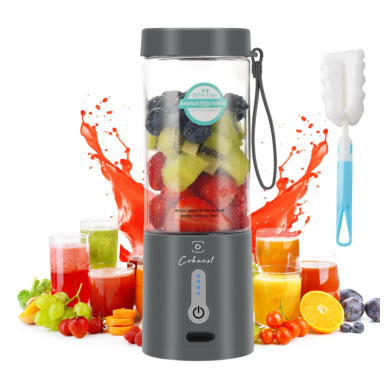

In [59]:
ageGen_pred("smile2.jpg")
emo_pred("smile2.jpg")
fuzzy_process(age1,gender1,mood)